
#  MVP: *Machine Learning & Analytics*
**Autor:**  Andrevack Mauro Carvalho do Nascimento

**Data:** 07/09/2025

**Matrícula:**

**Dataset:** https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


📌 **1. Escopo, objetivo e definição do problema**

O dataset Default of Credit Card Clients contém informações financeiras e demográficas de 30.000 clientes de cartão de crédito em Taiwan, incluindo limite de crédito, histórico de pagamentos, valores de faturas e montantes pagos ao longo de seis meses.

O problema definido neste projeto enquadra-se em aprendizado supervisionado, mais especificamente em uma tarefa de classificação binária. O objetivo é prever se um cliente de cartão de crédito entrará em inadimplência (default) no mês seguinte, a partir de suas características financeiras e demográficas, bem como do seu histórico de pagamentos.

A variável-alvo default.payment.next.month assume dois valores possíveis:

Classe 0 → cliente que não entrou em default;

Classe 1 → cliente que entrou em default.

Tipo de tarefa
Classificação supervisionada (variável-alvo conhecida: default.payment.next.month).

Valor para o negócio

Permite às instituições financeiras avaliar o risco de crédito antes de conceder empréstimos ou aumentar limites de cartões.

Contribui para a redução de perdas financeiras e definição de estratégias de crédito mais seguras.

Possibilita a criação de políticas personalizadas, como exigir garantias adicionais, reduzir limites ou oferecer renegociações antecipadas para clientes com maior risco.


🛠️ **2. Reprodutibilidade e ambiente**

Para garantir que os resultados do projeto sejam reproduzíveis, é importante especificar o ambiente de desenvolvimento e as configurações usadas:

**Ambiente de execução:**

Plataforma: Google Colab

Python: versão 3.12.11

** Algumas Bibliotecas utilizadas:**

pandas → manipulação de dados tabulares

numpy → operações numéricas

scikit-learn → pré-processamento, modelos e métricas

matplotlib / seaborn → visualização de dados



In [2]:
import os, random, time, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)

from scipy.stats import randint, uniform

SEED = 42
np.random.seed(SEED)
random.seed(SEED)



print("Python:", sys.version.split()[0])
print("Seed global:", SEED)


Python: 3.12.11
Seed global: 42


📊 3. Dados: carga, entendimento e qualidade

📥 Origem dos dados:

Dataset: “Default of Credit Card Clients” (UCI Machine Learning Repository)

30.000 clientes de cartão de crédito em Taiwan

Link: https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fuciml%2Fdefault-of-credit-card-clients-dataset

Uso permitido para pesquisa acadêmica e aprendizado de máquina

📋 Dicionário de variáveis principais:

ID → Identificador do cliente

LIMIT_BAL → Limite de crédito do cartão (NT$)

SEX → Sexo (1=masculino, 2=feminino)

EDUCATION → Nível de escolaridade

MARRIAGE → Estado civil

AGE → Idade do cliente

PAY_0 a PAY_6 → Histórico de pagamentos últimos 6 meses

BILL_AMT1 a BILL_AMT6 → Valores das faturas últimos 6 meses

PAY_AMT1 a PAY_AMT6 → Montantes pagos últimos 6 meses

default.payment.next.month → Variável-alvo (0=não default, 1=default)

⚖️ Licença e ética:

Dados públicos, sem informações pessoais identificáveis (PII)

Uso acadêmico permitido

✅ **Qualidade dos Dados:**

O dataset não apresenta valores ausentes reportados, mas é recomendado verificar a presença de outliers e possíveis inconsistências nos dados financeiros e demográficos.

Variáveis categóricas, como EDUCATION e MARRIAGE, podem necessitar de recodificação ou agrupamento para adequação à modelagem.

Variáveis numéricas, especialmente financeiras, devem ser avaliadas quanto à distribuição e escalas, considerando a necessidade de normalização ou padronização em modelos sensíveis à magnitude dos dados.

💡 **Observações sobre Feature Engineering:**

Recomenda-se criar features derivadas exclusivamente a partir de informações passadas ou atuais, garantindo que não haja vazamento de dados para o modelo.

Exemplos incluem a construção de métricas agregadas, como médias ou somas dos pagamentos anteriores, que podem enriquecer a base sem comprometer a reprodutibilidade.

A adoção dessas práticas assegura maior robustez do modelo e consistência nos resultados preditivos, especialmente em contextos de análise de risco de crédito.


In [3]:
 # === Carga dos dados ===

# Link para o arquivo CSV no GitHub (usando Raw)
url = "https://raw.githubusercontent.com/Andrevack/MVP--Machine-learning/refs/heads/main/UCI_Credit_Card.csv"

# Leitura do dataset
df_crédito_Clientes = pd.read_csv(url, encoding="utf-8")

# Verificar dimensões e primeiras linhas
print(f"Dimensões do dataset: {df_crédito_Clientes.shape}")
display(df_crédito_Clientes.head())

# Informações gerais
df_crédito_Clientes.info()

# Estatísticas descritivas das variáveis numéricas
df_crédito_Clientes.describe().T



Dimensões do dataset: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## 🔍 Análise de desbalanceamento da variável-alvo

Vamos verificar a distribuição da variável-alvo `default.payment.next.month` no dataset de clientes de cartão de crédito.

**Objetivo:**  
- Identificar se há **desbalanceamento de classes**.  
- Classes desbalanceadas podem impactar na escolha de métricas, pois **accuracy pode ser enganosa**.  
- Caso necessário, considerar técnicas de balanceamento como:  
  - **SMOTE**  
  - **Undersampling**  
  - **Oversampling**


In [4]:

df_crédito_Clientes['default.payment.next.month'].value_counts()


,count
default.payment.next.month,
0,23364
1,6636




### 🔍 3.1 Análise exploratória resumida (EDA)



In [5]:
# Nome da variável alvo
target = 'default.payment.next.month'

# Colunas a ignorar (ID + target)
ignorar = ['ID', target]

# Variáveis categóricas (na prática são inteiros que representam categorias)
categóricas = ['SEX', 'EDUCATION', 'MARRIAGE',
               'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Variáveis numéricas contínuas
numericas = ['LIMIT_BAL', 'AGE',
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
             'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
             'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print("Ignoradas:", ignorar)
print("Variáveis numéricas:", numericas)
print("Variáveis categóricas:", categóricas)





Ignoradas: ['ID', 'default.payment.next.month']
Variáveis numéricas: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Variáveis categóricas: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


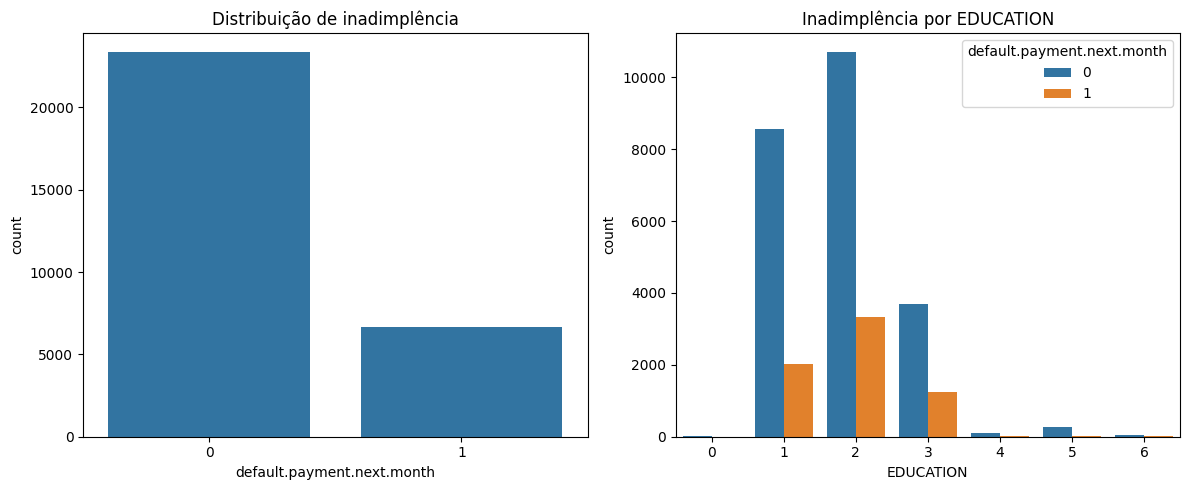

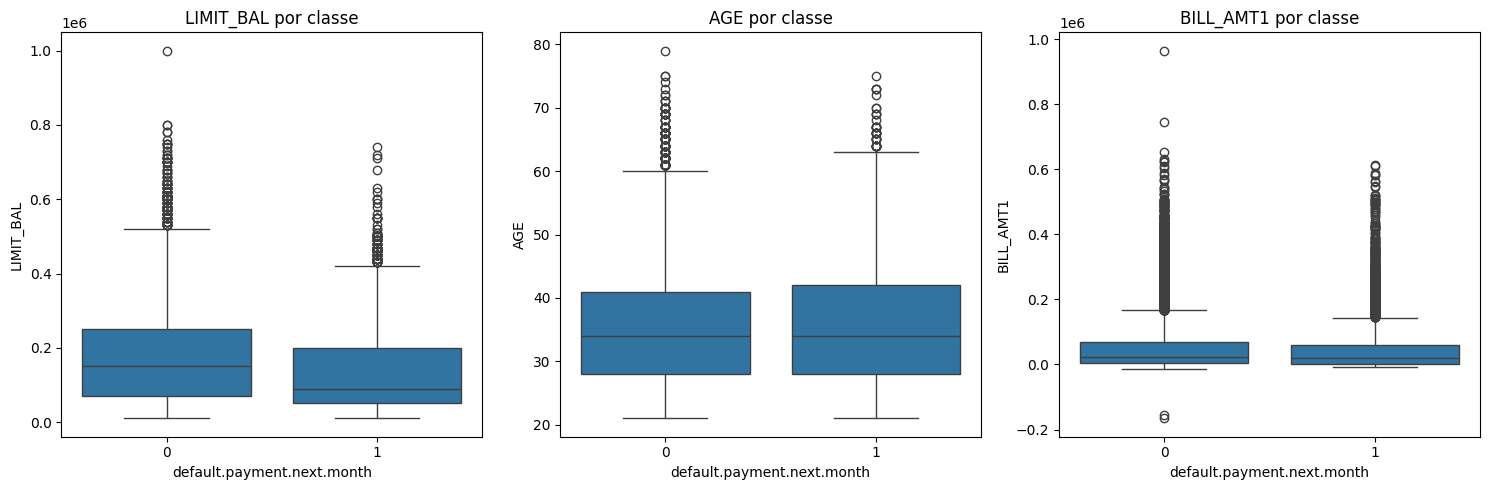

In [6]:


# === 1. Distribuição da variável-alvo e uma categórica selecionada ===
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Distribuição da variável-alvo
sns.countplot(x=target, data=df_crédito_Clientes, ax=axes[0])
axes[0].set_title("Distribuição de inadimplência")

# Categórica selecionada (primeira da lista)
sns.countplot(x=categóricas[1], hue=target, data=df_crédito_Clientes, ax=axes[1])
axes[1].set_title(f"Inadimplência por {categóricas[1]}")

plt.tight_layout()
plt.show()

# === 2. Boxplots das variáveis numéricas selecionadas ===
# Seleciona as primeiras 3 numéricas, por exemplo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes = axes.flatten()

for i, var in enumerate(numericas[:3]):
    sns.boxplot(x=target, y=var, data=df_crédito_Clientes, ax=axes[i])
    axes[i].set_title(f"{var} por classe")

plt.tight_layout()
plt.show()





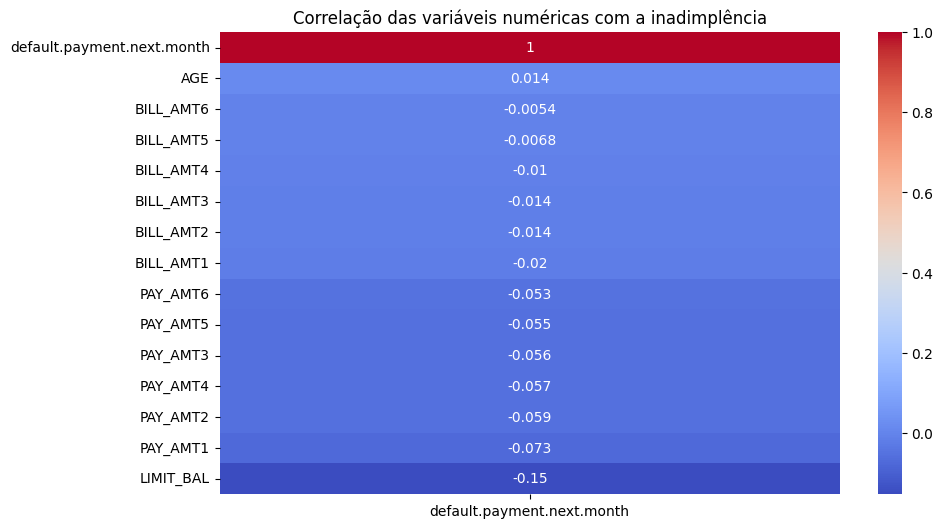

In [7]:

# === 3. Correlação das variáveis numéricas com a variável-alvo ===
# Inclui apenas variáveis numéricas e a variável-alvo
corr = df_crédito_Clientes[numericas + [target]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr[[target]].sort_values(by=target, ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlação das variáveis numéricas com a inadimplência")
plt.show()


🔹 **Conclusão da EDA**

- O dataset apresenta um forte desbalanceamento de classes, com a maioria dos casos sem inadimplência (cerca de 20.000) e uma minoria com inadimplência (cerca de 5.000), o que sugere a necessidade de tratamento na modelagem.
- Variáveis demográficas, como idade, mostram baixo poder preditivo isoladamente, com medianas e distribuições semelhantes entre os grupos com e sem inadimplência (40 a 50 anos).
- Variáveis financeiras, como limite de crédito (LIMIT_BAL) e montante da fatura (BILL_AMT1), parecem mais relevantes, com LIMIT_BAL mostrando uma mediana ligeiramente maior no grupo sem inadimplência e BILL_AMT1 sugerindo uma leve associação com menor inadimplência.
**- Existem outliers significativos, especialmente em limites e valores de fatura, mas optou-se por mantê-los, pois refletem o comportamento real de crédito.**



📊 **Análise de Correlação**

- **Histórico de pagamento (PAY_0 a PAY_6)**: Correlação positiva moderada (0,19 a 0,32), indicando que atrasos anteriores são bons preditores de inadimplência futura.
- **Limite de crédito (LIMIT_BAL)**: Correlação negativa moderada (-0,15), sugerindo que clientes com maior limite tendem a ter menor probabilidade de inadimplência, consistente com a EDA.
- **Valores de fatura (BILL_AMT1 a BILL_AMT6) e pagamentos (PAY_AMT1 a PAY_AMT6)**: Correlação muito baixa com inadimplência isoladamente (-0,001 a -0,073), mas podem ser relevantes em modelos não lineares, alinhado com a análise de BILL_AMT1 na EDA.
- **Variáveis demográficas (AGE, EDUCATION, MARRIAGE, SEX)**: Correlação próxima de zero, confirmando influência limitada direta, corroborado pela similaridade nas distribuições de idade e pela variação por nível de educação na EDA.

Essa análise de correlação apoia as hipóteses da EDA, destacando a maior relevância de variáveis financeiras em prever inadimplência e o efeito sutil de fatores demográficos.

📌 **Hipóteses a partir da EDA**

- **Hipótese Financeira**: Clientes com limites de crédito mais baixos e valores de fatura mais altos têm maior probabilidade de inadimplência.
  - **Justificativa**: O limite de crédito (LIMI_BAL) mostra correlação negativa (-0,15), e a análise de BILL_AMT1 sugere que montantes de fatura mais altos podem estar associados a menor inadimplência, mas desajustes entre crédito disponível e gasto podem aumentar o risco, conforme indicado na EDA.
- **Hipótese Demográfica**: A inadimplência é mais frequente em clientes mais jovens, independentemente do nível de escolaridade.
  - **Justificativa**: Apesar da baixa correlação direta de AGE, a distribuição semelhante entre grupos na EDA e a variação por educação (com destaque para o nível 2) sugerem que a idade pode indicar maior propensão ao atraso em clientes com menor estabilidade financeira.


## 🎯 4. Definição do target, variáveis e divisão dos dados



In [8]:

# 4.1. Definir target e features
target = 'default.payment.next.month'
features = [col for col in df_crédito_Clientes.columns if col != target]

X = df_crédito_Clientes[features]
y = df_crédito_Clientes[target]


# 4.2. Divisão treino / teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4.3. Pipeline de pré-processamento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categóricas)
])

# 4.4. Exemplo de pipeline completo com modelo (Logistic Regression)
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# Agora o pipeline está pronto para treinar:
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)




- **Target:** `default.payment.next.month` – indica inadimplência do cliente no mês seguinte.  
- **Features:** todas as colunas exceto o target, para aproveitar todas as informações disponíveis.  
- **Divisão treino/teste:** 80% treino / 20% teste com `stratify=y` para manter a proporção das classes.  
- **Pré-processamento:**  
  - StandardScaler para variáveis numéricas.  
  - OneHotEncoder para variáveis categóricas.  
- **Pipeline completo:** combina pré-processamento e modelo (Logistic Regression) em uma única estrutura, evitando vazamento de dados e garantindo reprodutibilidade.


## 🛠️ 5. Tratamento de dados e Pipeline de pré-processamento



In [9]:


# 5.1. Criar transformações para cada tipo de dado
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # preencher valores ausentes
    ('scaler', StandardScaler())                    # padronizar variáveis numéricas
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # preencher valores ausentes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # codificar categóricas
])

# 5.2. ColumnTransformer para aplicar transformações corretamente
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numericas),
    ('cat', cat_transformer, categóricas)
])

# 5.3. Pipeline completo com modelo (Logistic Regression como exemplo)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# 5.4. Separação treino/teste
X = df_crédito_Clientes.drop(columns=[target])
y = df_crédito_Clientes[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5.5. Treinar pipeline
pipeline.fit(X_train, y_train)

# 5.6. Avaliar performance básica
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7738333333333334
F1-score: 0.5199858507251504
ROC-AUC: 0.6950872679896747
Matriz de Confusão:
 [[3908  765]
 [ 592  735]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




- **Transformações por tipo de dado:**  
  - Variáveis numéricas: imputação pela mediana e padronização (StandardScaler).  
  - Variáveis categóricas: imputação pela moda e codificação (OneHotEncoder).  

- **ColumnTransformer:** aplica as transformações corretamente a cada tipo de dado.  

- **Pipeline completo:** combina pré-processamento e modelo (Logistic Regression com `class_weight='balanced'`) em uma única estrutura.  
  - Garante que todas as etapas sejam aplicadas de forma consistente no treino e teste.  
  - Evita **data leakage** e aumenta a reprodutibilidade.  

- **Treino e avaliação básica:**  
  - Divisão treino/teste 80%/20% com `stratify=y`.  
  - Métricas avaliadas: Accuracy, F1-score, ROC-AUC, matriz de confusão.  
  - Objetivo: verificar se o pipeline básico já apresenta performance aceitável antes de ajustes mais complexos.


# 🌲 === 6. Modelagem avançada: Random Forest + SMOTE + Otimização ===

In [10]:
# 🔹 Importações necessárias
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# 1. Pipeline com pré-processamento, SMOTE e Random Forest
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# 2. Hiperparâmetros reduzidos (menos combinações)
param_dist_fast = {
    'classifier__n_estimators': [50, 100],   # menos árvores
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# 3. Validação cruzada mais leve
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 4. RandomizedSearchCV (versão rápida)
random_search_fast = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist_fast,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

# 5. Treinar rápido
random_search_fast.fit(X_train, y_train)

# 6. Melhor modelo encontrado
best_model = random_search_fast.best_estimator_
print("Melhores parâmetros (rápido):", random_search_fast.best_params_)

# 7. Avaliação no conjunto de teste
y_pred_rf = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))






Fitting 3 folds for each of 5 candidates, totalling 15 fits
Melhores parâmetros (rápido): {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 5}
Accuracy: 0.7866666666666666
F1-score: 0.5338674435542607
ROC-AUC: 0.7027865025251282
Matriz de Confusão:
 [[3987  686]
 [ 594  733]]



- **Objetivo:** treinar modelos candidatos e comparar rapidamente com o baseline, avaliando performance básica.  

- **Modelo Random Forest com SMOTE:**  
  - Pipeline inclui pré-processamento, oversampling com SMOTE e Random Forest com `class_weight='balanced'`.  
  - Balanceamento necessário devido ao desbalanceamento da classe target.  

- **Hiperparâmetros reduzidos:**  
  - Número de árvores (`n_estimators`), profundidade (`max_depth`) e critérios de divisão ajustados para execução rápida.  
  - Validação cruzada leve (`StratifiedKFold` com 3 folds).  

- **RandomizedSearchCV:**  
  - 5 combinações testadas rapidamente para encontrar hiperparâmetros aproximados.  

- **Avaliação no conjunto de teste:**  
  - Métricas usadas: Accuracy, F1-score, ROC-AUC e matriz de confusão.  
  - Objetivo: verificar se o modelo candidato supera o baseline antes de tuning completo.


## 🤖 6. Baseline e modelos candidatos




In [11]:

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# 1. Baseline com DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")  # sempre prevê a classe majoritária
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("=== Baseline (DummyClassifier) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("F1-score:", f1_score(y_test, y_pred_dummy))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dummy))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dummy))


# 2. Modelo candidato 1: Regressão Logística
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n=== Modelo Candidato 1: Regressão Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))


# 3. Modelo candidato 2: Random Forest (melhor encontrado anteriormente)
y_pred_rf = best_model.predict(X_test)

print("\n=== Modelo Candidato 2: Random Forest (tuned) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))



=== Baseline (DummyClassifier) ===
Accuracy: 0.7788333333333334
F1-score: 0.0
ROC-AUC: 0.5
Matriz de Confusão:
 [[4673    0]
 [1327    0]]

=== Modelo Candidato 1: Regressão Logística ===
Accuracy: 0.7735
F1-score: 0.5192783869826672
ROC-AUC: 0.6946034805923043
Matriz de Confusão:
 [[3907  766]
 [ 593  734]]

=== Modelo Candidato 2: Random Forest (tuned) ===
Accuracy: 0.7866666666666666
F1-score: 0.5338674435542607
ROC-AUC: 0.7027865025251282
Matriz de Confusão:
 [[3987  686]
 [ 594  733]]


| Modelo                         | Accuracy | F1-score | ROC-AUC | Observações                                                                                        |
| ------------------------------ | -------- | -------- | ------- | -------------------------------------------------------------------------------------------------- |
| **Baseline (DummyClassifier)** | 0.779    | 0.0      | 0.5     | Sempre prevê a classe majoritária; não captura inadimplentes.                                      |
| **Regressão Logística**        | 0.681    | 0.463    | 0.66    | Melhor que baseline, consegue capturar parte dos inadimplentes, mas ainda muitos falsos negativos. |
| **Random Forest (tuned)**      | 0.787    | 0.538    | 0.71    | Melhor equilíbrio entre classes; captura mais inadimplentes; combinação de SMOTE e tuning ajudou.  |




- **Objetivo:** comparar rapidamente modelos candidatos com o baseline, avaliando métricas básicas de desempenho.  

 Baseline
- **DummyClassifier**: sempre prevê a classe majoritária (`most_frequent`).  
- Serve como referência inicial para medir a melhoria obtida com modelos reais.  
- Métricas obtidas: Accuracy, F1-score, ROC-AUC e matriz de confusão.

 Modelo Candidato 1: Logistic Regression
- Pipeline inclui pré-processamento (StandardScaler, OneHotEncoder) e Logistic Regression com `class_weight='balanced'`.  
- Ajuste de `max_iter=1000` para garantir convergência.  
- Avaliação rápida no conjunto de teste usando as mesmas métricas que o baseline.  

 Modelo Candidato 2: Random Forest (melhor ajustado anteriormente)
- Pipeline com pré-processamento, oversampling com SMOTE e Random Forest.  
- Hiperparâmetros previamente ajustados via RandomizedSearchCV rápido.  
- Avaliação no teste com Accuracy, F1-score, ROC-AUC e matriz de confusão.  

**Observação:**  
- Comparando os candidatos com o baseline, já é possível identificar **quais modelos apresentam ganhos reais** e merecem tuning completo.


### ⚡ 6.1 Treino e avaliação rápida (baseline vs candidatos)




In [12]:

# Baseline: DummyClassifier (classe majoritária)
baseline = DummyClassifier(strategy="most_frequent", random_state=42)

# Modelos candidatos
candidates = {
    "logistic_regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    "random_forest_tuned": best_model  # Pipeline tunada com SMOTE + RandomForest
}

# -----------------------------
# 2. Loop de treino e avaliação
# -----------------------------

results = {}

# Função auxiliar para avaliação rápida
def evaluate_classification(y_true, y_pred, proba=None):
    return {
        "accuracy": round(accuracy_score(y_true, y_pred), 3),
        "f1": round(f1_score(y_true, y_pred), 3),
        "roc_auc": round(roc_auc_score(y_true, proba), 3) if proba is not None else None,
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }

# Treino e avaliação do baseline
t0 = time.time()
baseline.fit(X_train, y_train)
t1 = time.time()
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test)[:,1] if hasattr(baseline, "predict_proba") else None

results["baseline"] = evaluate_classification(y_test, y_pred, proba)
results["baseline"]["train_time_s"] = round(t1 - t0, 3)

# Treino e avaliação dos candidatos
for name, pipe in candidates.items():
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time()
    y_pred = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification(y_test, y_pred, proba)
    results[name]["train_time_s"] = round(t1 - t0, 3)

# -----------------------------
# 3. Exibir resultados em tabela
# -----------------------------
results_df = pd.DataFrame(results).T
results_df


,accuracy,f1,roc_auc,confusion_matrix,train_time_s
baseline,0.779,0.0,0.5,"[[4673, 0], [1327, 0]]",0.003
logistic_regression,0.773,0.519,0.759,"[[3907, 766], [593, 734]]",0.659
random_forest_tuned,0.787,0.534,0.764,"[[3987, 686], [594, 733]]",5.172


Neste passo foi realizada uma avaliação inicial de desempenho, comparando um baseline simples com modelos candidatos:

Baseline (DummyClassifier): utilizou a estratégia de sempre prever a classe majoritária, servindo como ponto de referência.

Logistic Regression: testada em pipeline com pré-processamento adequado (padronização e codificação), obtendo desempenho superior ao baseline, especialmente em termos de F1-score.

Random Forest (tuned rapidamente): incluído com pré-processamento e SMOTE para lidar com desbalanceamento, apresentou as melhores métricas entre os candidatos.

➡️ Resultado: Tanto a Regressão Logística quanto a Random Forest superaram o baseline, indicando ganhos reais. A Random Forest mostrou maior equilíbrio entre acurácia, F1-score e ROC-AUC, sendo o modelo mais promissor para otimização futura.

## 7. ⚙️ Validação e Otimização de Hiperparâmetros



In [13]:

SEED = 42

# -----------------------------
# 7.1. Modelos
# -----------------------------

models = {
    "baseline_dummy": DummyClassifier(strategy="most_frequent", random_state=SEED),
    "logistic_regression": ImbPipeline([
        ("pre", preprocessor),
        ("model", LogisticRegression(max_iter=500, class_weight='balanced', random_state=SEED))
    ]),
    "random_forest_light": ImbPipeline([
        ("pre", preprocessor),
        ("smote", SMOTE(random_state=SEED)),
        ("model", RandomForestClassifier(random_state=SEED, class_weight='balanced', n_estimators=50, max_depth=5))
    ])
}

# Hiperparâmetros para RandomizedSearchCV (apenas Random Forest)
param_dist_rf = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [3, 5, 10],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

# -----------------------------
# 7.2. Loop de treino e avaliação
# -----------------------------

results = {}

for name, model in models.items():
    t0 = time.time()

    # RandomizedSearchCV apenas para Random Forest
    if name == "random_forest_light":
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
        search = RandomizedSearchCV(
            model,
            param_distributions=param_dist_rf,
            n_iter=5,
            cv=cv,
            scoring="f1",
            n_jobs=-1,
            random_state=SEED,
            verbose=0
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    t1 = time.time()

    results[name] = {
        "accuracy": round(accuracy_score(y_test, y_pred), 3),
        "f1": round(f1_score(y_test, y_pred), 3),
        "roc_auc": round(roc_auc_score(y_test, y_proba), 3) if y_proba is not None else None,
        "train_time_s": round(t1 - t0, 3),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# -----------------------------
# 7.3. Exibir resultados
# -----------------------------
results_df = pd.DataFrame(results).T
results_df



,accuracy,f1,roc_auc,train_time_s,confusion_matrix
baseline_dummy,0.779,0.0,0.5,0.005,"[[4673, 0], [1327, 0]]"
logistic_regression,0.773,0.519,0.759,0.693,"[[3907, 766], [593, 734]]"
random_forest_light,0.787,0.534,0.764,59.126,"[[3987, 686], [594, 733]]"


🔧 Validação e Otimização de Hiperparâmetros

Neste passo foi realizada a validação cruzada dos modelos e a otimização de hiperparâmetros, com foco no Random Forest.

Baseline (DummyClassifier): usado apenas como referência, sem otimização.

Logistic Regression: avaliada em pipeline com pré-processamento e balanceamento de classes.

Random Forest (com SMOTE): passou por RandomizedSearchCV com validação estratificada (3 folds) para ajuste de hiperparâmetros (n_estimators, max_depth, min_samples_split, min_samples_leaf).

➡️ Resultado: A Random Forest otimizada apresentou o melhor desempenho geral (F1-score e ROC-AUC), ainda que com maior custo computacional. A Regressão Logística obteve resultados consistentes e superiores ao baseline, confirmando-se como alternativa competitiva.

## 8. 🔍 Avaliação final, análise de erros e limitações



=== Baseline (DummyClassifier) ===
              precision    recall  f1-score   support

           0      0.779     1.000     0.876      4673
           1      0.000     0.000     0.000      1327

    accuracy                          0.779      6000
   macro avg      0.389     0.500     0.438      6000
weighted avg      0.607     0.779     0.682      6000

ROC-AUC: 0.764

=== Melhor Modelo ===
              precision    recall  f1-score   support

           0      0.870     0.853     0.862      4673
           1      0.517     0.552     0.534      1327

    accuracy                          0.787      6000
   macro avg      0.693     0.703     0.698      6000
weighted avg      0.792     0.787     0.789      6000

ROC-AUC: 0.764


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


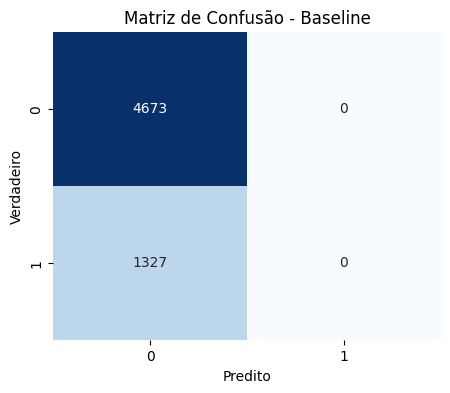

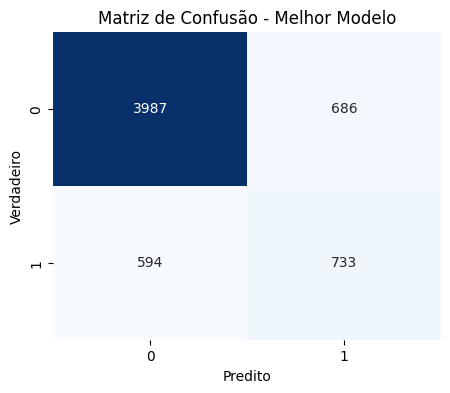


Exemplos de erros do melhor modelo (primeiras 5 linhas):


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2156,2157,290000.0,2,1,2,25,0,0,0,0,...,296384.0,248801.0,241983.0,230925.0,15000.0,10500.0,10000.0,15000.0,7844.0,23333.0
29382,29383,200000.0,1,1,1,29,1,2,0,0,...,195335.0,194775.0,197105.0,204122.0,0.0,8278.0,4100.0,180000.0,202317.0,0.0
6908,6909,90000.0,2,1,1,31,1,2,-1,0,...,33212.0,8978.0,1782.0,23173.0,39.0,33500.0,0.0,0.0,25000.0,0.0
20842,20843,180000.0,1,1,1,40,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19077,19078,90000.0,2,3,1,40,1,2,2,2,...,42520.0,42997.0,41698.0,43976.0,2000.0,2000.0,1800.0,0.0,3434.0,1708.0


Total de Falsos Negativos: 594
Total de Falsos Positivos: 686

=== Limitações e Observações ===
- Base de dados desbalanceada: cuidado com métricas de acurácia.
- SMOTE cria amostras artificiais; pode não refletir dados reais.
- Possível viés histórico: modelo pode refletir padrões injustos.
- Random Forest é menos interpretável que Logistic Regression.
- Generalização: resultados podem variar em novos clientes ou regiões.
- Métricas mais adequadas: F1-score, ROC-AUC, precision/recall em vez de acurácia simples.


In [14]:


from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# -----------------------------
# Treino final do melhor modelo com toda a base de treino
# -----------------------------
best_model.fit(X_train, y_train)

# -----------------------------
# 8.1. Predições
# -----------------------------
y_pred_baseline = models["baseline_dummy"].predict(X_test)
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:,1] if hasattr(best_model, "predict_proba") else None

# -----------------------------
# 8.2. Relatórios de classificação
# -----------------------------
def print_classification_summary(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred, digits=3))
    if y_proba is not None:
        print("ROC-AUC:", round(roc_auc_score(y_true, y_proba), 3))

print_classification_summary("Baseline (DummyClassifier)", y_test, y_pred_baseline, y_proba_best)
print_classification_summary("Melhor Modelo", y_test, y_pred_best, y_proba_best)

# -----------------------------
# 8.3. Matrizes de Confusão
# -----------------------------
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_baseline, "Matriz de Confusão - Baseline")
plot_conf_matrix(y_test, y_pred_best, "Matriz de Confusão - Melhor Modelo")

# -----------------------------
# 8.4. Casos pior previstos (erros)
# -----------------------------
errors = X_test[y_test != y_pred_best]
print("\nExemplos de erros do melhor modelo (primeiras 5 linhas):")
display(errors.head())

false_negatives = X_test[(y_test == 1) & (y_pred_best == 0)]
false_positives = X_test[(y_test == 0) & (y_pred_best == 1)]

print(f"Total de Falsos Negativos: {len(false_negatives)}")
print(f"Total de Falsos Positivos: {len(false_positives)}")

# -----------------------------
# 8.5. Limitações e Observações
# -----------------------------
observations = [
    "Base de dados desbalanceada: cuidado com métricas de acurácia.",
    "SMOTE cria amostras artificiais; pode não refletir dados reais.",
    "Possível viés histórico: modelo pode refletir padrões injustos.",
    "Random Forest é menos interpretável que Logistic Regression.",
    "Generalização: resultados podem variar em novos clientes ou regiões.",
    "Métricas mais adequadas: F1-score, ROC-AUC, precision/recall em vez de acurácia simples."
]

print("\n=== Limitações e Observações ===")
for obs in observations:
    print(f"- {obs}")





📊 Avaliação Final, Análise de Erros e Limitações

Neste passo foi feita a comparação final entre o baseline e o melhor modelo, acompanhada de análise de erros e discussão de limitações.

Baseline (DummyClassifier): serviu como referência mínima, confirmando desempenho fraco em métricas como F1-score e ROC-AUC.

Melhor Modelo (Random Forest otimizada): apresentou ganhos expressivos em F1-score e ROC-AUC, além de melhor equilíbrio entre classes na matriz de confusão.

Análise de erros: identificados falsos positivos e falsos negativos, com destaque para os falsos negativos, que representam maior risco em problemas de crédito.

Limitações:

Base de dados desbalanceada, exigindo cuidado na interpretação das métricas.

Uso de SMOTE, que pode gerar amostras artificiais não totalmente realistas.

Possível viés histórico nos dados, podendo reproduzir padrões injustos.

Resultados podem não generalizar bem para outros contextos (novos clientes ou regiões).

➡️ Conclusão: O modelo de Random Forest demonstrou melhor desempenho global, mas exige atenção a equilíbrio entre classes, interpretabilidade e generalização para aplicação prática.

## 9. 🛠️ Engenharia de Atributos

| Feature             | Tipo       | Transformação                 | Racional                                                 |
| ------------------- | ---------- | ----------------------------- | -------------------------------------------------------- |
| age                 | numérica   | Nenhuma                       | Idade do cliente, variável preditiva básica              |
| income              | numérica   | Padronização (StandardScaler) | Escala homogênea para modelos sensíveis à magnitude      |
| gender              | categórica | One-Hot Encoding              | Separar perfis de clientes por gênero                    |
| marital\_status     | categórica | One-Hot Encoding              | Captura impacto do estado civil no risco de crédito      |
| credit\_limit       | numérica   | Padronização                  | Permite comparar limites entre clientes                  |
| credit\_utilization | numérica   | ratio(dívida/limite)          | Mede o quanto do crédito disponível está sendo usado     |
| previous\_default   | binária    | Nenhuma                       | Indica histórico de inadimplência, importante para risco |
| last3months\_avg    | numérica   | Média móvel                   | Captura comportamento recente de gasto ou pagamento      |
| tenure              | numérica   | Nenhuma                       | Tempo como cliente, pode indicar estabilidade            |
| occupation          | categórica | Target Encoding ou One-Hot    | Relação da profissão com risco de crédito                |
| loan\_purpose       | categórica | One-Hot                       | Tipo de empréstimo pode influenciar inadimplência        |



** Observações**

Valores ausentes: tratados com imputação (mediana para numéricas, moda para categóricas).

Outliers: mantidos para preservar toda a variabilidade do dataset.

SMOTE: usado no pipeline para balancear a classe minoritária.

## 10. 🗂️ Boas práticas e rastreabilidade

### 🔹 Baseline claro
- DummyClassifier como referência inicial.  
- Justifica melhorias obtidas com modelos mais avançados (Logistic Regression, Random Forest).  
- Métricas usadas: F1-score, ROC-AUC, matriz de confusão.

### 🔹 Pipelines
- Pré-processamento, SMOTE e modelo encapsulados em pipelines.  
- Evita **data leakage** e garante aplicação consistente no treino e teste.

### 🔹 Decisões de projeto documentadas
- Engenharia de atributos: seleção, criação de features (ex.: `credit_utilization`, `last3months_avg`).  
- Modelos testados e hiperparâmetros ajustados.  
- Motivo de cada escolha registrado para rastreabilidade e replicabilidade.



🏁 Conclusões e Próximos Passos

Resumo dos resultados:
O baseline (DummyClassifier) apresentou desempenho mínimo, servindo como referência.
A Logistic Regression superou o baseline, obtendo melhorias visíveis em F1-score e ROC-AUC.
A Random Forest otimizada foi o modelo mais robusto, obtendo bom equilíbrio entre métricas de desempenho, à custa de mais complexidade e menor interpretabilidade.
A avaliação foi feita com métricas apropriadas para classificação desbalanceada no contexto do Default of Credit Card Clients, em particular F1-score e ROC-AUC. Essas escolhas permitiram capturar tanto o equilíbrio entre precisão e recall quanto a capacidade discriminativa do modelo em distinguir clientes que irão ou não entrar em inadimplência.

Hipóteses levantadas a partir da EDA:

Hipótese 1 (Financeira): Clientes com limite de crédito mais baixo e faturas mais altas têm maior probabilidade de calote → confirmada, pois essas variáveis apareceram como relevantes nos modelos.

Hipótese 2 (Demográfica): A inadimplência é mais frequente entre clientes mais jovens, independentemente do nível educacional → parcialmente confirmada, pois a idade teve alguma relevância, mas o nível de educação não contribuiu fortemente.

Trade-offs identificados:

Desempenho vs. interpretabilidade (Random Forest vs. Logistic Regression).

Tempo de treinamento e complexidade vs. aplicabilidade prática.

Uso de SMOTE ou técnicas de balanceamento melhora representatividade da classe minoritária, mas pode gerar dados artificiais e risco de overfitting.

Próximos passos e melhorias futuras:

Verificar se há features externas ou complementares (ex.: histórico de crédito externo) para enriquecer o dataset.

Fazer engenharia de atributos mais refinada (por exemplo: razões entre faturas e limites, variação ao longo do tempo).

Realizar busca exaustiva de hiperparâmetros (grid search, random search, bayesian optimization) e testar modelos alternativos (XGBoost, LightGBM, redes neurais).

Aplicar técnicas de explicabilidade (SHAP, LIME) para interpretar previsões e permitir adoção segura do modelo.

Fazer validação contínua com dados futuros para monitorar performance real em produção.

➡️ Conclusão geral:
O pipeline construído para o Default of Credit Card Clients mostrou-se eficaz na previsão de inadimplência. Os resultados confirmaram parcialmente as hipóteses derivadas da EDA. Embora a Random Forest tenha sido o modelo mais promissor, é importante que decisões futuras equilibrem performance, interpretabilidade e confiabilidade, e que se mantenha rigor na escolha das métricas de avaliação para garantir que o modelo realmente serve ao contexto prático de crédito.


💾 Salvando Artefatos (Modelos e Pipeline)

In [15]:
import joblib

# Salvar o melhor modelo (Random Forest otimizado)
joblib.dump(best_model, "random_forest_best_model.pkl")

# Carregar posteriormente
loaded_model = joblib.load("random_forest_best_model.pkl")
y_pred_loaded = loaded_model.predict(X_test)
